<a href="https://colab.research.google.com/github/MoncefDj/AI-DS-Masters/blob/main/Machine_Learning_2_Workshop_Evaluating_and_Tunning_Machine_Learning_Models_for_Real_World_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1
  style="
    border: 2px solid aqua;
    border-radius: 8px;
    padding: 8px;
    text-align: center;
  "
>
  Machine Learning 2 Workshop: Evaluating and Tunning Machine Learning Models for Real-World Applications
</h1>

**By:**
- Djezza Moncef
- Sadoudi Abdessamad
  
**Under the supervision of:**
- Dr. Belal Khaldi

## About the Dataset

We will be using the Car Sales dataset, which includes information about different cars, such as price, size, and other relevant details. This dataset is sourced from AnalytixLabs for the purpose of prediction.

## importing necessary libraries

In [ ]:
# Install required packages
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=990cbf08923388b015048f0cabccdd29d32ed689d87abf9c8253aa6570d18847
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import PartialDependenceDisplay
from scipy import stats
from math import log
import lime
import lime.lime_tabular
import shap

In [ ]:
# Initialize SHAP
shap.initjs()


## Exploratory Data Analysis (EDA)

In [ ]:
carSales = pd.read_csv('Car_sales.csv')
carSales

Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545                  NaN   
153        Volvo      S70              15.245                  NaN   
154        Volvo      V70              17.531                  NaN   
155        Volvo      C70               3.493                  NaN   
156        Volvo      S80              18.969                  NaN   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      Passenger               28.40          3.2       225.0      108.1   
2      Passenger                 NaN          3.2       225.0      106.9   
3      Passenger               42.00          3.5       210.0      114.6   
4      Passenger               23.99          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger               24.40          1.9       160.0      100.5   
153    Passenger               27.50          2.4       168.0      104.9   
154    Passenger               28.80          2.4       168.0      104.9   
155    Passenger               45.50          2.3       236.0      104.9   
156    Passenger               36.00          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]

In [ ]:
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

- Some values are missing; let's use Missingno to gain more insight into them.

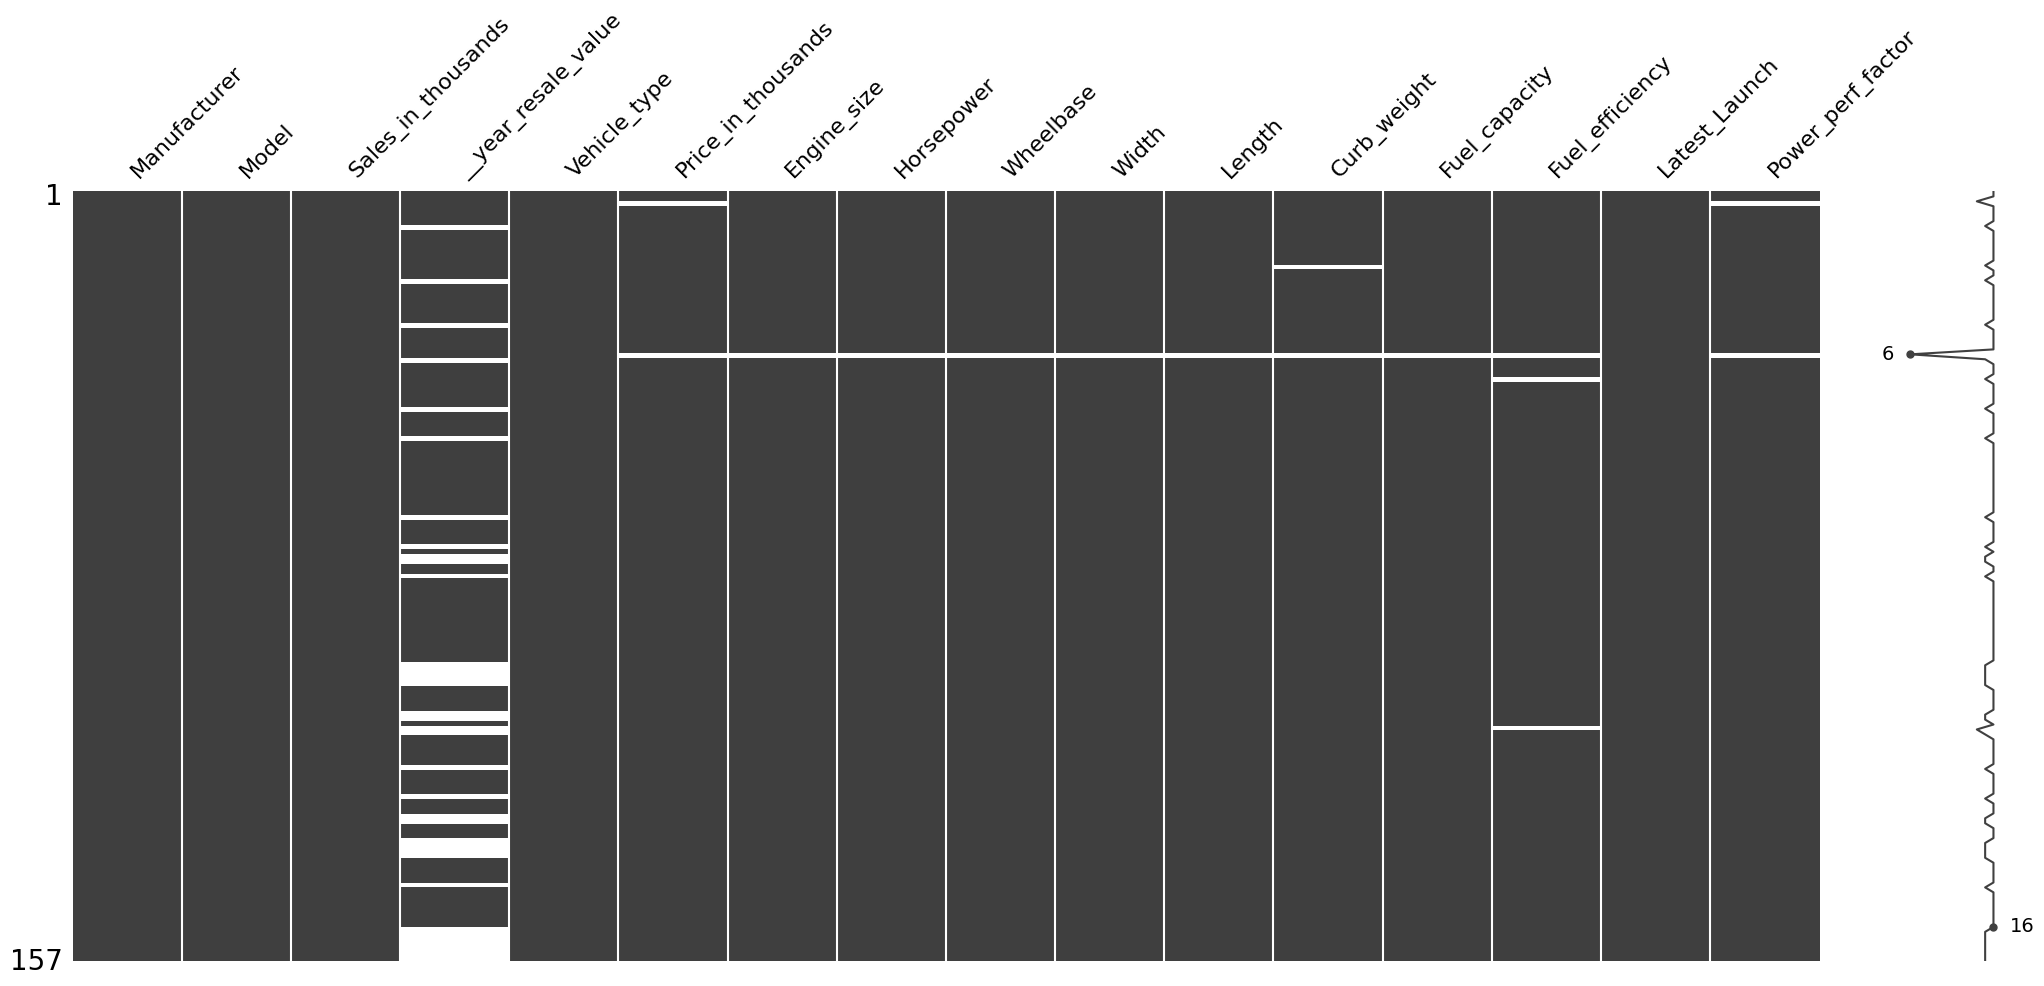

In [ ]:
msno.matrix(carSales)
plt.show()

- We can see that many missing values are in the `__year_resale_value` column. Assuming a missing value means the car didn't resell, we'll fill these with 0. Since the other column has only a few missing values, we can drop those rows.

In [ ]:
carSales.__year_resale_value =carSales.__year_resale_value.replace(np.nan, 0, regex=True)
carSales.dropna(inplace=True)

- Let’s check for any duplicates.

In [ ]:
carSales.duplicated().sum()

0

- We can see there are 0 duplicates.
- Now, let's check for any outliers.

In [ ]:
# Get numeric columns
numeric_cols = carSales.select_dtypes(include=['float64', 'int64']).columns

# Define a color sequence
colors = px.colors.qualitative.Set3

# Create figure with subplots - two columns layout
fig = make_subplots(
    rows=len(numeric_cols),
    cols=2,
    horizontal_spacing=0.1,
    vertical_spacing=0.05
)

# Create histogram + box plot for each numeric column
for idx, col in enumerate(numeric_cols):
    # Get color for this variable (cycle through colors if more variables than colors)
    color = colors[idx % len(colors)]

    # Add histogram on the left
    fig.add_trace(
        go.Histogram(
            x=carSales[col],
            name=col,
            showlegend=False,
            marker_color=color
        ),
        row=idx+1, col=1
    )

    # Add box plot on the right
    fig.add_trace(
        go.Box(
            x=carSales[col],
            name=col,
            showlegend=False,
            marker_color=color,
            line_color=color
        ),
        row=idx+1, col=2
    )

    # Add x-axis titles
    fig.update_xaxes(title_text=col, row=idx+1, col=1)  # Histogram
    fig.update_xaxes(title_text=col, row=idx+1, col=2)  # Box Plot

# Update layout
fig.update_layout(
    height=300 * len(numeric_cols),  # Adjust height based on number of variables
    width=1200,
    title_text="Distribution of Numeric Variables",
    showlegend=False,
    bargap=0.1
)

# Update y-axes to remove labels
for axis in fig.layout:
    if axis.startswith('yaxis'):
        fig.layout[axis].update(showticklabels=False)

fig.show()

- The box plots indicate some outliers; however, all are logically possible, so we won’t make any changes.

- Let’s do some descriptive statistics.

In [ ]:
carSales.describe().T

count        mean        std         min         25%  \
Sales_in_thousands   152.0   53.359072  68.938380    0.110000   13.714000   
__year_resale_value  152.0   13.879539  12.707497    0.000000    7.668750   
Price_in_thousands   152.0   27.331822  14.418669    9.235000   17.888750   
Engine_size          152.0    3.049342   1.049818    1.000000    2.300000   
Horsepower           152.0  184.809211  56.823152   55.000000  147.500000   
Wheelbase            152.0  107.413816   7.717839   92.600000  102.900000   
Width                152.0   71.088816   3.464666   62.600000   68.375000   
Length               152.0  187.059211  13.471247  149.400000  177.475000   
Curb_weight          152.0    3.376184   0.636593    1.895000    2.964750   
Fuel_capacity        152.0   17.959211   3.937582   10.300000   15.775000   
Fuel_efficiency      152.0   23.842105   4.304788   15.000000   21.000000   
Power_perf_factor    152.0   76.704153  25.180983   23.276272   59.755537   

                            50%         75%         max  
Sales_in_thousands    29.213000   68.069750  540.561000  
__year_resale_value   12.892500   17.806250   67.550000  
Price_in_thousands    22.747000   31.938750   85.500000  
Engine_size            3.000000    3.575000    8.000000  
Horsepower           175.000000  211.250000  450.000000  
Wheelbase            107.000000  112.200000  138.700000  
Width                 70.400000   73.100000   79.900000  
Length               186.650000  195.125000  224.500000  
Curb_weight            3.336000    3.821500    5.572000  
Fuel_capacity         17.200000   19.800000   32.000000  
Fuel_efficiency       24.000000   26.000000   45.000000  
Power_perf_factor     71.514623   89.408406  188.144323

- What is the relationship between a car’s performance factor (`Power_perf_factor`) and its price (`Price_in_thousands`)?

In [ ]:
trace1 =go.Scatter( x=carSales.Power_perf_factor,
                    y=carSales.Price_in_thousands,
                    mode ="markers",

                    marker =dict(color=carSales.Power_perf_factor,size=(carSales.__year_resale_value/2),sizemin=4),
                    text= carSales.Model)

data = [trace1]
layout = dict(title = 'Power_perf_factor vs Price_in_thousands',
              xaxis= dict(title= 'Power_perf_factor',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price_in_thousands',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

- When the `Power_perf_factor` increases, the `Price_in_thousands` increases as well.

- Is there a relationship between a car’s resale value and its price?

In [ ]:
trace=go.Scatter(
    x=carSales.__year_resale_value,
    y=carSales.Price_in_thousands,
    mode='markers',
    marker =dict(color=carSales.Power_perf_factor,size=(carSales.Sales_in_thousands/10),sizemin=4),
    text=(carSales.Model))

data = [trace]
layout = dict(title = 'Year resale value vs Price_in_thousands',
              xaxis= dict(title= 'year_resale_value',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price_in_thousands',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

- If we eliminate the cars that didn't sell, we notice a positive correlation between `Price_in_thousands` and `year_resale_value`.

- What is the relationship between sales volume and car price?

In [ ]:
fig = px.scatter(carSales,
                 x='Sales_in_thousands',
                 y='Price_in_thousands',
                 title='Sales_in_thousands vs. Price in Thousands')
fig.update_traces(marker_size=5)
fig.show()

- We can see that cars priced over 50 thousand aren't selling much, while cheaper cars aren't necessarily selling a lot either.

- What is the correlation between different numeric variables in the dataset?

In [ ]:
# Select only numeric columns
numeric_cols = carSales.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.columns,
    colorscale='RdBu',  # A diverging color scale
    colorbar=dict(title='Correlation'),
    zmin=-1, zmax=1,  # Set limits for color scale
    hoverongaps=False,  # Do not show gaps in the hover
    text=correlation.values,  # Display correlation values
    texttemplate="%{text:.2f}",  # Format to show two decimal places
    textfont=dict(color="white" if correlation.values.mean() < 0 else "black")  # Text color based on background
))

# Update layout
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800,
    height=800,
)

# Show the figure
fig.show()

- The heatmap reveals some interesting insights:
  1. Cars with a high Power_perf_factor tend to be expensive, have high horsepower, larger engines, greater curb weight, high fuel capacity, and width, with a strong resale possibility. However, their fuel efficiency is significantly lower.
  2. Cars with high fuel efficiency are typically smaller in size and have lower horsepower.
  3. Interestingly, there is a significant correlation between wheelbase and the number of car sales, as well as with the length.

In [ ]:
carBrand=list(carSales['Manufacturer'].unique())
carType=list(carSales['Vehicle_type'].unique())
salesThousand_ratio=[]
yearResaleValue_ratio=[]
priceThousand_ratio=[]
priceThousand_ratioType=[]
yearResaleValue_ratioType=[]
salesThousand_ratioType=[]

for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    salesThousand_rate=sum(x.Sales_in_thousands)/len(x)
    salesThousand_ratio.append(salesThousand_rate)
datasalesTousands=pd.DataFrame({"car_brand":carBrand,"salesThousand_ratio":salesThousand_ratio})
new_index=(datasalesTousands['salesThousand_ratio'].sort_values(ascending=False)).index.values
shorted_salesThousandsData=datasalesTousands.reindex(new_index)

for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    yearResaleValue_rate=sum(x.__year_resale_value)/len(x)
    yearResaleValue_ratio.append(yearResaleValue_rate)
datayearResaleValue=pd.DataFrame({"car_brand":carBrand,"yearResaleValue_ratio":yearResaleValue_ratio})
new_index=(datayearResaleValue['yearResaleValue_ratio'].sort_values(ascending=False)).index.values
shorted_yearResaleValueData=datayearResaleValue.reindex(new_index)

for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    priceThousand_rate=sum(x.Price_in_thousands)/len(x)
    priceThousand_ratio.append(priceThousand_rate)
datapriceThousand=pd.DataFrame({"car_brand":carBrand,"priceThousand_ratio":priceThousand_ratio})
new_index=(datapriceThousand['priceThousand_ratio'].sort_values(ascending=False)).index.values
shorted_priceThousandData=datapriceThousand.reindex(new_index)

for i in carType:
    x=carSales[carSales['Vehicle_type']==i]
    x.Price_in_thousands=x.Price_in_thousands.replace(np.nan,0)
    priceThousand_rate=sum(x.Price_in_thousands)/len(x)
    priceThousand_ratioType.append(priceThousand_rate)
datapriceThousandcartype=pd.DataFrame({"car_type":carType,"priceThousand_ratio":priceThousand_ratioType})

for i in carType:
    x=carSales[carSales['Vehicle_type']==i]
    x.__year_resale_value=x.__year_resale_value.replace(np.nan,0)
    yearResaleValue_rate=sum(x.__year_resale_value)/len(x)
    yearResaleValue_ratioType.append(yearResaleValue_rate)
datayearResaleValuecartype=pd.DataFrame({"car_type":carType,"yearResaleValue_ratio":yearResaleValue_ratioType})

for i in carType:
    x=carSales[carSales['Vehicle_type']==i]

    salesThousand_rate=sum(x.Sales_in_thousands)/len(x)
    salesThousand_ratioType.append(salesThousand_rate)
datasalesThousandcartype=pd.DataFrame({"car_type":carType,"salesThousand_ratio":salesThousand_ratioType})

<ipython-input-15-932963da61c4>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-932963da61c4>:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- How do car brands compare to each other in terms of sales?

In [ ]:
trace=go.Bar(
    x=shorted_salesThousandsData.car_brand,
    y=shorted_salesThousandsData.salesThousand_ratio,
    type='bar',
    marker=dict(color=shorted_salesThousandsData.salesThousand_ratio,line=dict(color='rgb(0,0,0)',width=1.5)),
    text=shorted_salesThousandsData.car_brand
    )
data=[trace]
layout=dict(title="Car brand sales thousands ratio",
           xaxis=dict(title="car_brand"),
           yaxis=dict(title="salesThousand_ratio"),
           barmode='relative')#If we don't, they stand side by side.



# fig = dict(data = data, layout = layout)
fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(barmode='relative',
    title={

        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(128, 0, 0,0.5)'})

- How do car brands compare in terms of resale value?

In [ ]:
fig = px.bar(shorted_yearResaleValueData,
                 x='car_brand',
                 y='yearResaleValue_ratio',
                 title='Car brand year resale ratio',
                 color="car_brand")
fig.update_traces()
fig.show()

- How do car brands compare in terms of pricing?

In [ ]:
fig = px.bar(shorted_priceThousandData,
                 x='car_brand',
                 y='priceThousand_ratio',
                 title='Car brand price thousand ratio',
                 color="car_brand")
fig.update_traces()
fig.show()

- Which car types have the highest year resale value ratio?

In [ ]:
fig = px.bar(datayearResaleValuecartype,
                 x='car_type',
                 y='yearResaleValue_ratio',
                 title="Car types year resale ratio",
                 color="car_type")
fig.update_traces()
fig.show()

- Which car types have the highest sales thousand ratio?

In [ ]:
fig = px.bar(datasalesThousandcartype,
                 x='car_type',
                 y='salesThousand_ratio',
                 title="Car types salesThousand_ratio",
                 color="car_type")
fig.update_traces()
fig.show()

- Which car types have the highest price thousand ratio?

In [ ]:
trace=go.Bar(
    x=datapriceThousandcartype.car_type,
    y=datapriceThousandcartype.priceThousand_ratio,
    type='bar',
    marker=dict(color=datapriceThousandcartype.priceThousand_ratio,line=dict(color='rgb(0,0,0)',width=1.5)),
    text=datapriceThousandcartype.car_type
    )
data=[trace]
layout=dict(title="Car types price thousand ratio",
           xaxis=dict(title="car_type"),
           yaxis=dict(title="priceThousand_ratio"),
           barmode='relative')#If we don't, they stand side by side.



# fig = dict(data = data, layout = layout)
fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(barmode='relative',
    title={

        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(128, 0, 0,0.5)'})

# Model Selection and Implementation

- The task we will work on is a regression task where we will predict the `__year_resale_value` and the `Sales_in_thousands` using the following Machine Learning models:
1. Linear Regression
1. Decision Tree Regressor
1. Random Forest Regressor
1. Least-Squares Linear Regression


- Metric calculation function

In [ ]:
def calculate_additional_metrics(y_true, y_pred):
    """
    Calculate various regression evaluation metrics.

    Parameters:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values.

    Returns:
    dict: Dictionary containing calculated metrics.
    """
    # Mean of true values
    y_mean = np.mean(y_true)

    # Dimensions of data
    m = len(y_true)
    n = y_pred.shape[1] if len(y_pred.shape) > 1 else 1

    # Calculate variance-based metrics
    tss = np.sum((y_true - y_mean) ** 2)  # Total sum of squares
    rss = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ess = np.sum((y_pred - y_mean) ** 2)  # Explained sum of squares

    # Coefficients of determination (R² and adjusted R²)
    r2 = 1 - (rss / tss)
    adjusted_r2 = 1 - (1 - r2) * ((m - 1) / (m - n - 1))

    # Residual calculations
    residuals = y_true - y_pred
    residual_variance = np.var(residuals)

    # Complexity and likelihood metrics
    mallows_cp = (rss + 2 * (n + 1) * residual_variance) / m
    likelihood = np.sum(stats.norm.logpdf(residuals, 0, np.sqrt(residual_variance)))
    aic = 2 * ((n + 2) - likelihood)
    bic = np.log(m) * (n + 2) - 2 * likelihood

    # Return all metrics in a dictionary
    return {
        'TSS': tss,
        'RSS': rss,
        'ESS': ess,
        'R2': r2,
        'Adjusted_R2': adjusted_r2,
        'Mallows_Cp': mallows_cp,
        'AIC': aic,
        'BIC': bic,
        'Residuals': residuals,  # Added for visualization purposes
        'Predictions': y_pred    # Added for visualization purposes
    }

- Data preparation function

In [ ]:
# Function to preprocess data: normalizes numerical features and encodes categorical variables
def prepare_data(df, target_column):
    """
    Prepare data for modeling by handling categorical variables and normalizing numerical features.

    Parameters:
    df (pd.DataFrame): Input data.
    target_column (str): Name of target variable.

    Returns:
    tuple: (features DataFrame, target Series)
    """
    # Create a copy to avoid modifying original data
    df_copy = df.copy()

    # Separate features and drop irrelevant columns
    features = df_copy.drop(['Sales_in_thousands', '__year_resale_value'], axis=1)

    # Identify numerical and categorical columns
    numerical_columns = features.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = features.select_dtypes(include=['object']).columns

    # Normalize numerical features using StandardScaler
    scaler = StandardScaler()
    features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

    # Perform one-hot encoding for categorical features (z-score normalization)
    features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

    # Extract target variable and normalize if numerical
    target = df_copy[target_column]
    if target.dtype in ['int64', 'float64']:
        target = (target - target.mean()) / target.std()

    return features, target


- Cross-validation function

In [ ]:
def perform_cross_validation(X, y, target_name):
    """
    Perform 5-fold cross-validation for multiple models

    Parameters:
    X: pandas DataFrame, feature matrix
    y: pandas Series, target variable
    target_name: str, name of target variable

    Returns:
    dict: Dictionary containing results for each model
    """
    # Define models (removed StandardScaler since data is already normalized)
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
    }

    # Initialize K-fold cross validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    # Perform cross-validation for each model
    for name, model in models.items():
        fold_metrics = []
        fold_residuals = []
        fold_predictions = []
        fold_y_tests = []

        # Store models trained in each fold
        fold_models = []

        # Iterate through folds
        for train_idx, test_idx in cv.split(X):
            # Split data into training and testing sets
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Train model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Store the trained model
            fold_models.append(model)

            # Calculate metrics for this fold
            metrics = calculate_additional_metrics(y_test, y_pred)
            fold_metrics.append(metrics)
            fold_residuals.extend(metrics['Residuals'])
            fold_predictions.extend(metrics['Predictions'])
            fold_y_tests.extend(y_test)

        # Calculate mean of metrics across folds
        results[name] = {
            metric: np.mean([fold[metric] for fold in fold_metrics if metric not in ['Residuals', 'Predictions']])
            for metric in fold_metrics[0].keys() if metric not in ['Residuals', 'Predictions']
        }

        # Calculate standard deviation of metrics across folds
        results[name].update({
            f"{metric}_std": np.std([fold[metric] for fold in fold_metrics if metric not in ['Residuals', 'Predictions']])
            for metric in fold_metrics[0].keys() if metric not in ['Residuals', 'Predictions']
        })

        # Store residuals, predictions, and models for visualization
        results[name]['Residuals'] = np.array(fold_residuals)
        results[name]['Predictions'] = np.array(fold_predictions)
        results[name]['True_Values'] = np.array(fold_y_tests)
        results[name]['Models'] = fold_models  # Store the list of models

    return results


- Hyperparameter Tuning Function


In [ ]:
def hyperparameter_tuning(X, y):
    """
    Perform hyperparameter tuning for various regression models using GridSearchCV.

    Parameters:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target variable.

    Returns:
    dict: Dictionary containing best parameters and metrics for each model.
    """
    # Define hyperparameter grids for each model
    param_grids = {
        'Linear Regression': {},  # No hyperparameters to tune for Linear Regression
        'Decision Tree': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        },
        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    }

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    results = {}  # Store results for all models

    # Loop through each model
    for name, model in models.items():
        print(f"Tuning hyperparameters for {name}...")
        # Initialize GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,  # 5-fold cross-validation
            scoring='r2',  # Use R² as the scoring metric
            n_jobs=-1,  # Utilize all available cores
            verbose=2,
            return_train_score=True
        )
        # Fit GridSearchCV
        grid_search.fit(X, y)

        # Use the best estimator to calculate metrics
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X)
        metrics = calculate_additional_metrics(y, y_pred)

        # Save results
        results[name] = {
            'Best Params': grid_search.best_params_,
            'Metrics': metrics,
            'Grid Search Results': grid_search.cv_results_,
            'Model': best_model  # Added for visualization purposes
        }

    return results


- Main execution code

In [ ]:
# Define models globally
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Define target variables
targets = ['__year_resale_value', 'Sales_in_thousands']
all_results = {}

# Perform evaluation for each target variable
for target in targets:
    print(f"\nPerforming cross-validation for {target}")
    X, y = prepare_data(carSales, target)
    all_results[target] = perform_cross_validation(X, y, target)

# Print formatted results
for target, results in all_results.items():
    print(f"\nResults for {target}:")
    print("=" * 100)

    # Get metrics (excluding standard deviation metrics)
    metrics = [m for m in results[list(results.keys())[0]].keys()
              if not m.endswith('_std') and m not in ['Residuals', 'Predictions', 'True_Values', 'Models']]

    # Print header
    print(f"{'Model':<20}", end='')
    for metric in metrics:
        print(f"{metric:<20}", end='')
    print("\n" + "-" * 100)

    # Print results for each model with standard deviations
    for model_name, model_results in results.items():
        print(f"{model_name:<20}", end='')
        for metric in metrics:
            value = model_results[metric]
            std = model_results.get(f"{metric}_std", 0)
            print(f"{value:.3f} (±{std:.3f})"[:19].ljust(20), end='')
        print()



Performing cross-validation for __year_resale_value

Performing cross-validation for Sales_in_thousands

Results for __year_resale_value:
Model               TSS                 RSS                 ESS                 R2                  Adjusted_R2         Mallows_Cp          AIC                 BIC                 
----------------------------------------------------------------------------------------------------
Linear Regression   29.434 (±13.954)    22.071 (±8.772)     13.489 (±5.828)     0.008 (±0.815)      -0.026 (±0.843)     0.819 (±0.320)      80.247 (±11.983)    84.490 (±11.995)    
Decision Tree       29.434 (±13.954)    39.031 (±12.839)    28.705 (±6.644)     -0.493 (±0.452)     -0.545 (±0.467)     1.454 (±0.497)      98.475 (±7.897)     102.718 (±7.873)    
Random Forest       29.434 (±13.954)    23.959 (±6.603)     9.888 (±3.872)      0.041 (±0.436)      0.008 (±0.451)      0.892 (±0.253)      83.835 (±8.241)     88.077 (±8.232)     

Results for Sales_in_thousands:
Mod

In [ ]:
for target, results in all_results.items():
    print(f"\nInteractive Visualizations for {target}")
    for model_name, model_results in results.items():
        # Scatter plot of True vs Predicted values
        fig = go.Figure()
        fig.add_trace(go.Scatter(
            x=model_results['True_Values'],
            y=model_results['Predictions'],
            mode='markers',
            name='Predicted vs True',
            marker=dict(color='blue')
        ))
        fig.add_trace(go.Scatter(
            x=model_results['True_Values'],
            y=model_results['True_Values'],
            mode='lines',
            name='Ideal Fit',
            line=dict(color='red', dash='dash')
        ))
        fig.update_layout(
            title=f"{model_name} - True vs Predicted Values for {target}",
            xaxis_title='True Values',
            yaxis_title='Predicted Values'
        )
        fig.show()

        # Residuals Plot
        residuals = model_results['Residuals']
        fig = go.Figure()
        fig.add_trace(go.Histogram(
            x=residuals,
            nbinsx=30,
            name='Residuals',
            marker_color='green'
        ))
        fig.update_layout(
            title=f"{model_name} - Residuals Distribution for {target}",
            xaxis_title='Residuals',
            yaxis_title='Frequency'
        )
        fig.show()



Interactive Visualizations for __year_resale_value



Interactive Visualizations for Sales_in_thousands


In [ ]:
for target, results in all_results.items():
    metrics_to_plot = ['R2', 'Adjusted_R2', 'RSS', 'AIC', 'BIC']
    metric_values = {metric: [] for metric in metrics_to_plot}
    metric_stds = {metric: [] for metric in metrics_to_plot}
    model_names = []

    for model_name, model_results in results.items():
        model_names.append(model_name)
        for metric in metrics_to_plot:
            metric_values[metric].append(model_results[metric])
            metric_stds[metric].append(model_results.get(f"{metric}_std", 0))

    # Create separate plots for each metric
    for metric in metrics_to_plot:
        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=model_names,
            y=metric_values[metric],
            error_y=dict(type='data', array=metric_stds[metric], visible=True),
            name=metric
        ))
        fig.update_layout(
            title=f"{metric} Comparison Across Models for {target}",
            xaxis_title='Model',
            yaxis_title=f"{metric} Value"
        )
        fig.show()


### Analysis of Results for `__year_resale_value`

#### **Decision Tree**
- **R²**: Negative average value (-0.493) indicates the model performs worse than predicting the mean of the data, highlighting poor predictive performance.
- **RSS**: Significantly higher (39.031) compared to other models, showing it struggles to minimize errors.
- **Complexity Metrics**: Mallows' \( C_p \), AIC, and BIC values are all higher, reflecting increased model complexity and poor fit.
- **Conclusion**: The decision tree is the worst-performing model for this target.

#### **Linear Regression**
- **R²**: Near zero (0.008 on average) indicates the model captures almost no variance in the data. The high standard deviation (±0.815) shows instability across folds.
- **RSS**: Lower (22.071) than the decision tree, meaning it fits the data better overall.
- **Complexity Metrics**: Mallows' \( C_p \), AIC, and BIC are slightly lower than the random forest, indicating better simplicity and performance trade-off.
- **Conclusion**: Linear regression is relatively better than the decision tree but remains unstable and weak in explaining variance.

#### **Random Forest**
- **R²**: Slightly better than linear regression (0.041 on average), indicating it captures more variance. However, its instability is evident from the high standard deviation (±0.436).
- **RSS**: Higher (23.959) than linear regression but still far better than the decision tree.
- **Complexity Metrics**: Slightly higher \( C_p \), AIC, and BIC than linear regression, suggesting increased complexity without substantial performance improvement.
- **Conclusion**: Random forest is slightly better than linear regression at capturing variance but is more complex and not significantly better overall.

#### **General Observations**
- **Adjusted R²**: Slightly lower than R² for all models, indicating the possibility of overfitting by including unnecessary features.
- **Overall Best Model**: Linear regression emerges as the best option for `__year_resale_value` despite its instability, as it achieves lower RSS, \( C_p \), AIC, and BIC while being less complex.


### Analysis of Results for `Sales_in_thousands`

#### **Decision Tree**
- **R²**: Negative (-0.771) on average, again performing worse than the mean prediction.
- **RSS**: Significantly higher (43.757) compared to other models, confirming poor fit.
- **Complexity Metrics**: Mallows' \( C_p \), AIC, and BIC are the highest among models, indicating high complexity with little to no performance gain.
- **Conclusion**: The decision tree performs the worst, similar to its performance for the other target variable.

#### **Linear Regression**
- **R²**: Positive (0.192 on average), indicating the model explains some variance in the data. The standard deviation (±0.323) suggests moderate stability.
- **RSS**: Lower (21.245) than other models, indicating better fit to the data.
- **Complexity Metrics**: Achieves the lowest \( C_p \), AIC, and BIC, reflecting better performance and simplicity compared to the other models.
- **Conclusion**: Linear regression is the best-performing model for this target.

#### **Random Forest**
- **R²**: Slightly worse than linear regression (0.134 on average), with comparable standard deviation (±0.237).
- **RSS**: Higher (24.675) than linear regression, indicating less accurate predictions.
- **Complexity Metrics**: Higher \( C_p \), AIC, and BIC than linear regression, reflecting its increased complexity without a corresponding improvement in performance.
- **Conclusion**: Random forest is more complex and performs slightly worse than linear regression.

#### **General Observations**
- **Overall Best Model**: Linear regression again proves to be the best choice due to its simplicity and better overall performance metrics.

### Final Conclusion
- For both `__year_resale_value` and `Sales_in_thousands`, **linear regression** is the best model. It balances simplicity, lower complexity metrics (\( C_p \), AIC, and BIC), and better data fit (lower RSS).
- The decision tree consistently performs the worst across both targets.

In [ ]:
all_hyperparameter_results = {}

for target in targets:
    print(f"\n{'=' * 50}")
    print(f"Processing Target: {target}")
    print(f"{'=' * 50}")
    X, y = prepare_data(carSales, target)
    all_hyperparameter_results[target] = hyperparameter_tuning(X, y)

# Display the results in a structured and formatted way
for target, results in all_hyperparameter_results.items():
    print(f"\n{'=' * 80}")
    print(f"Results for Target: {target}")
    print(f"{'=' * 80}\n")

    for model_name, details in results.items():
        print(f"Model: {model_name}")
        print(f"{'-' * 40}")

        # Print Best Parameters
        print(f"Best Parameters:")
        for param, value in details['Best Params'].items():
            print(f"  {param:<20}: {value}")

        # Print Metrics
        print("\nMetrics:")
        for metric, value in details['Metrics'].items():
            if metric not in ['Residuals', 'Predictions']:
                print(f"  {metric:<20}: {value:.4f}")

        print(f"{'-' * 40}\n")



Processing Target: __year_resale_value
Tuning hyperparameters for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Processing Target: Sales_in_thousands
Tuning hyperparameters for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Results for Target: __year_resale_value

Model: Linear Regression
----------------------------------------
Best Parameters:

Metrics:
  TSS                 : 151.0000
  RSS                 : 0.0000
  ESS                 : 151.0000
  R2                  : 1.0000
  Adjusted_R2         : 

In [ ]:
# Compare performance metrics before and after hyperparameter tuning
for target in targets:
    print(f"\nComparing Performance Before and After Hyperparameter Tuning for {target}")
    models_to_compare = ['Linear Regression', 'Decision Tree', 'Random Forest']

    for model_name in models_to_compare:
        # Extract metrics before tuning
        before_metrics = all_results[target][model_name]
        # Extract metrics after tuning
        after_metrics = all_hyperparameter_results[target][model_name]['Metrics']

        # Create a list of metrics to compare
        metrics_to_compare = ['R2', 'Adjusted_R2', 'RSS', 'AIC', 'BIC']
        for metric in metrics_to_compare:
            # Extract mean and std for before tuning
            before_mean = before_metrics[metric]
            before_std = before_metrics.get(f"{metric}_std", 0)

            # After tuning, std might not be available
            after_mean = after_metrics[metric]
            after_std = 0  # Std not available after tuning

            # Prepare data for plotting
            conditions = ['Before Tuning', 'After Tuning']
            means = [before_mean, after_mean]
            stds = [before_std, after_std]

            # Create bar chart with error bars
            fig = go.Figure()

            fig.add_trace(go.Bar(
                x=conditions,
                y=means,
                error_y=dict(type='data', array=stds, visible=True),
                name=metric
            ))

            fig.update_layout(
                title=f"{metric} Comparison for {model_name} ({target})",
                xaxis_title='Condition',
                yaxis_title=f"{metric} Value"
            )
            fig.show()



Comparing Performance Before and After Hyperparameter Tuning for __year_resale_value



Comparing Performance Before and After Hyperparameter Tuning for Sales_in_thousands


- Visualizations of Predictions Before and After Hyperparameter Tuning

In [ ]:
for target in targets:
    print(f"\nVisualizing Predictions Before and After Hyperparameter Tuning for {target}")
    models_to_compare = ['Linear Regression', 'Decision Tree', 'Random Forest']

    X, y = prepare_data(carSales, target)

    for model_name in models_to_compare:
        # Before tuning
        before_model = all_results[target][model_name]
        y_true_before = before_model['True_Values']
        y_pred_before = before_model['Predictions']

        # After tuning
        after_model = all_hyperparameter_results[target][model_name]['Model']
        y_pred_after = after_model.predict(X)
        y_true_after = y  # Since we used the entire dataset during hyperparameter tuning

        # Scatter plot comparison
        fig = make_subplots(rows=1, cols=2, subplot_titles=('Before Tuning', 'After Tuning'))

        # Before Tuning
        fig.add_trace(go.Scatter(
            x=y_true_before,
            y=y_pred_before,
            mode='markers',
            name='Before Tuning',
            marker=dict(color='blue')
        ), row=1, col=1)
        fig.add_trace(go.Scatter(
            x=y_true_before,
            y=y_true_before,
            mode='lines',
            name='Ideal Fit',
            line=dict(color='red', dash='dash')
        ), row=1, col=1)

        # After Tuning
        fig.add_trace(go.Scatter(
            x=y_true_after,
            y=y_pred_after,
            mode='markers',
            name='After Tuning',
            marker=dict(color='green')
        ), row=1, col=2)
        fig.add_trace(go.Scatter(
            x=y_true_after,
            y=y_true_after,
            mode='lines',
            name='Ideal Fit',
            line=dict(color='red', dash='dash')
        ), row=1, col=2)

        fig.update_layout(
            title_text=f"{model_name} - True vs Predicted Values Comparison for {target}",
            xaxis_title='True Values',
            yaxis_title='Predicted Values',
            showlegend=False
        )
        fig.show()



Visualizing Predictions Before and After Hyperparameter Tuning for __year_resale_value



Visualizing Predictions Before and After Hyperparameter Tuning for Sales_in_thousands


### Comparative Analysis of Model Performance


**1. Linear Regression**

- **Before Tuning:**
  - **R²** values were low (0.008 and 0.192), indicating poor model fit.
  - **RSS** values were substantial (22.071 and 21.245), showing significant errors.

- **After Tuning:**
  - **R²** values improved to **1.0000** for both targets, suggesting a perfect fit.
  - **RSS** values dropped to **0.0000**, indicating no residual errors.
  - **Concerns:**
    - Such perfect metrics are highly improbable (Overfitting possibility).

**2. Decision Tree**

- **Before Tuning:**
  - **R²** values were negative, indicating the model performed worse than the mean predictor.
  - **High RSS** values reflected poor fit.

- **After Tuning:**
  - **R²** improved significantly (to 0.7180 and 0.9223), showing better explanatory power.
  - **RSS** decreased for `Sales_in_thousands` but slightly increased for `__year_resale_value`.
  - **AIC and BIC** decreased for `Sales_in_thousands` but increased for `__year_resale_value`.

**3. Random Forest**

- **Before Tuning:**
  - **R²** values were low (0.041 and 0.134), indicating poor fit.
  - **RSS** values were relatively high.

- **After Tuning:**
  - **R²** improved significantly (to 0.8984 and 0.8654).
  - **RSS** decreased, indicating better fit.
  - **AIC and BIC** increased, which indicate wasn't complex enough to perform well before.


**Final Conclusion**

- **Significant Improvements Noted:** Hyperparameter tuning has improved model performance metrics across the board.

- **Serious Concerns Identified:**

  - **Unrealistic Perfect Metrics:** The Linear Regression model's perfect scores are a red flag.

## Model Interpretability and Explainability

In [ ]:
def plot_feature_importance(model, X, model_name, target_name):
    """
    Plots feature importance for tree-based models with enhanced readability.

    Parameters:
    - model: Trained model with feature_importances_ attribute.
    - X: Feature DataFrame used for training the model.
    - model_name: Name of the model (string).
    - target_name: Name of the target variable (string).
    """
    import plotly.express as px

    # Check if the model has the attribute 'feature_importances_'
    if not hasattr(model, 'feature_importances_'):
        print(f"The model {model_name} does not have feature_importances_ attribute.")
        return

    # Get feature importances
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=True)

    # Normalize importances
    feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

    # Plot using Plotly
    fig = px.bar(
        feature_importance_df,
        x='Importance',
        y='Feature',
        orientation='h',
        title=f'Feature Importance for {model_name} - Target: {target_name}',
        labels={'Importance': 'Normalized Importance', 'Feature': 'Features'},
        width=800,
        height=600
    )
    fig.update_traces(marker_color='steelblue', texttemplate='%{x:.2f}', textposition='outside')
    fig.update_layout(
        yaxis=dict(autorange="reversed"),
        margin=dict(l=200, r=50, t=50, b=50),
        font=dict(size=12),
        showlegend=False
    )
    fig.show()


In [ ]:
def plot_partial_dependence(model, X, features, model_name, target_name):
    """
    Plots partial dependence for specified features with enhanced readability.

    Parameters:
    - model: Trained model.
    - X: Feature DataFrame used for training the model.
    - features: List of feature names or indices to plot.
    - model_name: Name of the model (string).
    - target_name: Name of the target variable (string).
    """
    from sklearn.inspection import PartialDependenceDisplay

    # Set the number of rows and columns based on the number of features
    n_features = len(features)
    n_cols = min(n_features, 2)
    n_rows = (n_features + 1) // 2

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
    display = PartialDependenceDisplay.from_estimator(
        model,
        X,
        features,
        ax=ax,
        kind='average',
        n_jobs=-1,
        grid_resolution=100,
        random_state=42
    )
    plt.suptitle(f'Partial Dependence Plot for {model_name} - Target: {target_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
def explain_with_lime(model, X_train, X_test, feature_names, instance_idx=0):
    """
    Explains a prediction using LIME with enhanced visualization.

    Parameters:
    - model: Trained model with predict method.
    - X_train: Training feature DataFrame.
    - X_test: Test feature DataFrame.
    - feature_names: List of feature names.
    - instance_idx: Index of the instance in X_test to explain.
    """
    from lime import lime_tabular
    from IPython.display import display, HTML

    explainer = lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=feature_names,
        class_names=['Prediction'],
        verbose=False,
        mode='regression',
        random_state=42
    )
    # Choose an instance to explain
    instance = X_test.iloc[instance_idx]
    exp = explainer.explain_instance(
        data_row=instance.values,
        predict_fn=model.predict,
        num_features=10
    )
    # Display the explanation in the notebook
    html_explanation = exp.as_html()
    display(HTML(html_explanation))


In [ ]:
def explain_with_shap(model, X, model_name, target_name):
    """
    Generates SHAP values and plots summary for tree-based models.

    Parameters:
    - model: Trained tree-based model.
    - X: Feature DataFrame used for training the model.
    - model_name: Name of the model (string).
    - target_name: Name of the target variable (string).
    """
    import shap

    # Ensure all data in X is numeric
    X_numeric = X.astype(np.float64)

    # Use TreeExplainer for tree-based models
    explainer = shap.TreeExplainer(model)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_numeric)

    # For regression models, shap_values is an array
    # For classification models, shap_values is a list (one array per class)
    # Adjust accordingly
    if isinstance(shap_values, list):
        # For classification, choose the class of interest
        shap_values = shap_values[1]  # Assuming binary classification and interest in the positive class

    # Plot summary bar plot for feature importance
    shap.summary_plot(
        shap_values,
        X_numeric,
        plot_type='bar',
        show=False
    )
    plt.title(f'SHAP Feature Importance for {model_name} - Target: {target_name}')
    plt.tight_layout()
    plt.show()

    # Plot detailed summary plot
    shap.summary_plot(
        shap_values,
        X_numeric,
        show=False
    )
    plt.title(f'SHAP Summary Plot for {model_name} - Target: {target_name}')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_linear_coefficients(model, X, model_name, target_name):
    """
    Plots coefficients for linear regression models with enhanced readability.
    """
    import plotly.express as px

    coefficients = model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=True)

    # Plot using Plotly
    fig = px.bar(
        coef_df,
        x='Coefficient',
        y='Feature',
        orientation='h',
        title=f'Coefficients for {model_name} - Target: {target_name}',
        labels={'Coefficient': 'Coefficient Value', 'Feature': 'Features'},
        width=800,
        height=600
    )
    fig.update_traces(
        marker_color=['steelblue' if c >= 0 else 'salmon' for c in coef_df['Coefficient']],
        texttemplate='%{x:.2f}',
        textposition='outside'
    )
    fig.update_layout(
        yaxis=dict(autorange="reversed"),
        margin=dict(l=200, r=50, t=50, b=50),
        font=dict(size=12),
        showlegend=False
    )
    fig.show()


In [ ]:
def explain_with_shap_linear(model, X):
    """
    Generates SHAP values and plots summary for linear models with enhanced readability.
    """
    import shap

    X_numeric = X.astype(np.float64)
    explainer = shap.LinearExplainer(model, X_numeric)
    shap_values = explainer.shap_values(X_numeric)

    # Plot summary
    shap.summary_plot(
        shap_values,
        X_numeric,
        plot_type='bar',
        max_display=10,
        color='steelblue',
        show=False
    )
    plt.title('SHAP Feature Importance for Linear Model')
    plt.gcf().set_size_inches(10, 6)
    plt.tight_layout()
    plt.show()

    # Detailed summary plot
    shap.summary_plot(
        shap_values,
        X_numeric,
        max_display=10,
        show=False
    )
    plt.gcf().set_size_inches(10, 6)
    plt.tight_layout()
    plt.show()

## Applying Explainability Techniques to Best Models

### Feature Importance

In [ ]:
# Plot feature importance using the best models after hyperparameter tuning
for target, results in all_hyperparameter_results.items():
    X, y = prepare_data(carSales, target)

    # Print a header to separate the plots for each target
    print(f"\n========== Feature Importance Plots for Target: {target} ==========\n")

    for model_name, model_details in results.items():
        if model_name in ['Decision Tree', 'Random Forest']:
            best_model = model_details['Model']
            plot_feature_importance(best_model, X, f"{model_name} (Tuned)", target)



========== Feature Importance Plots for Target: __year_resale_value ==========




========== Feature Importance Plots for Target: Sales_in_thousands ==========



### Partial Dependence Plots


========== Partial Dependence Plots for Target: __year_resale_value ==========



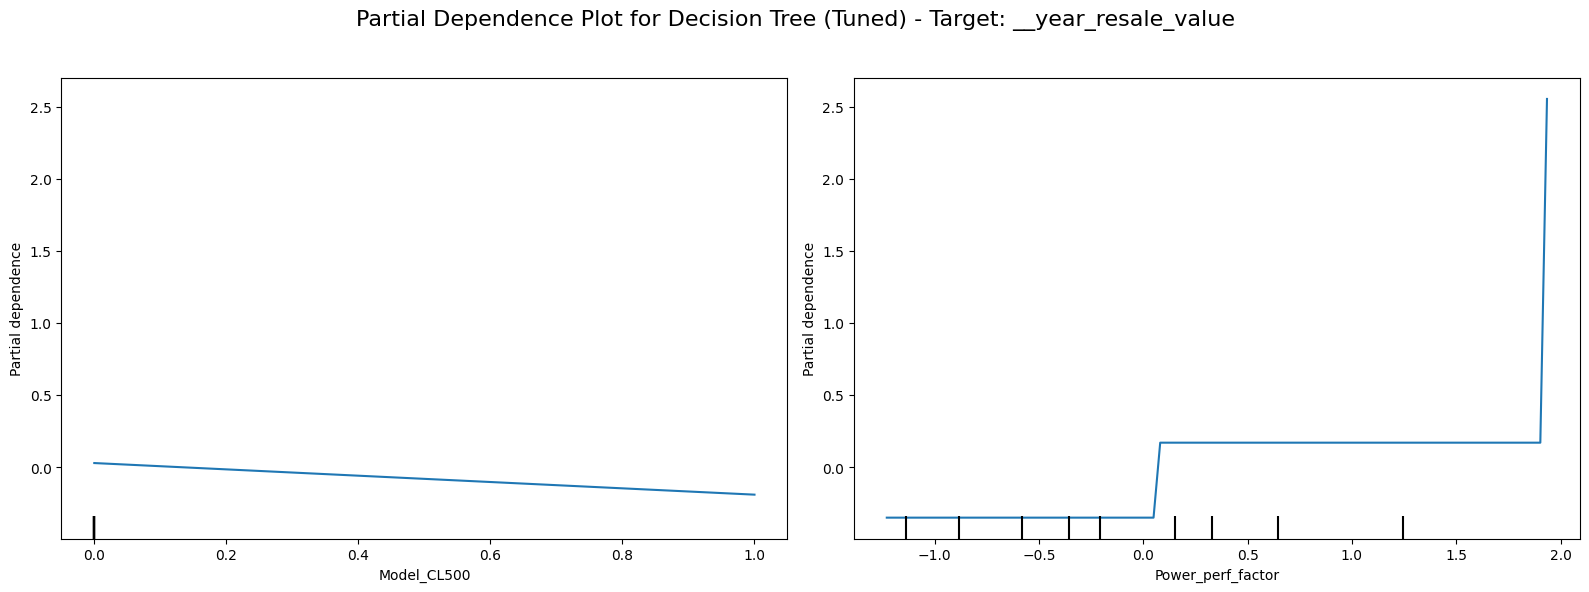

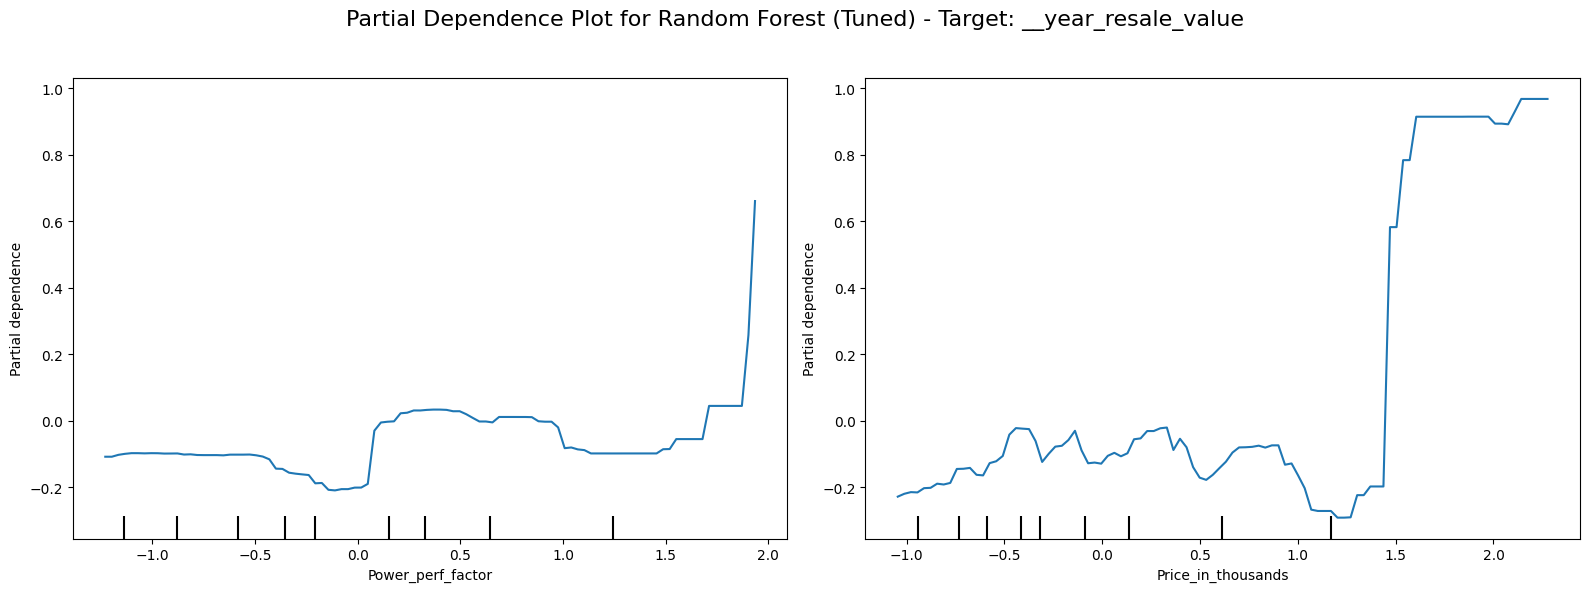


========== Partial Dependence Plots for Target: Sales_in_thousands ==========



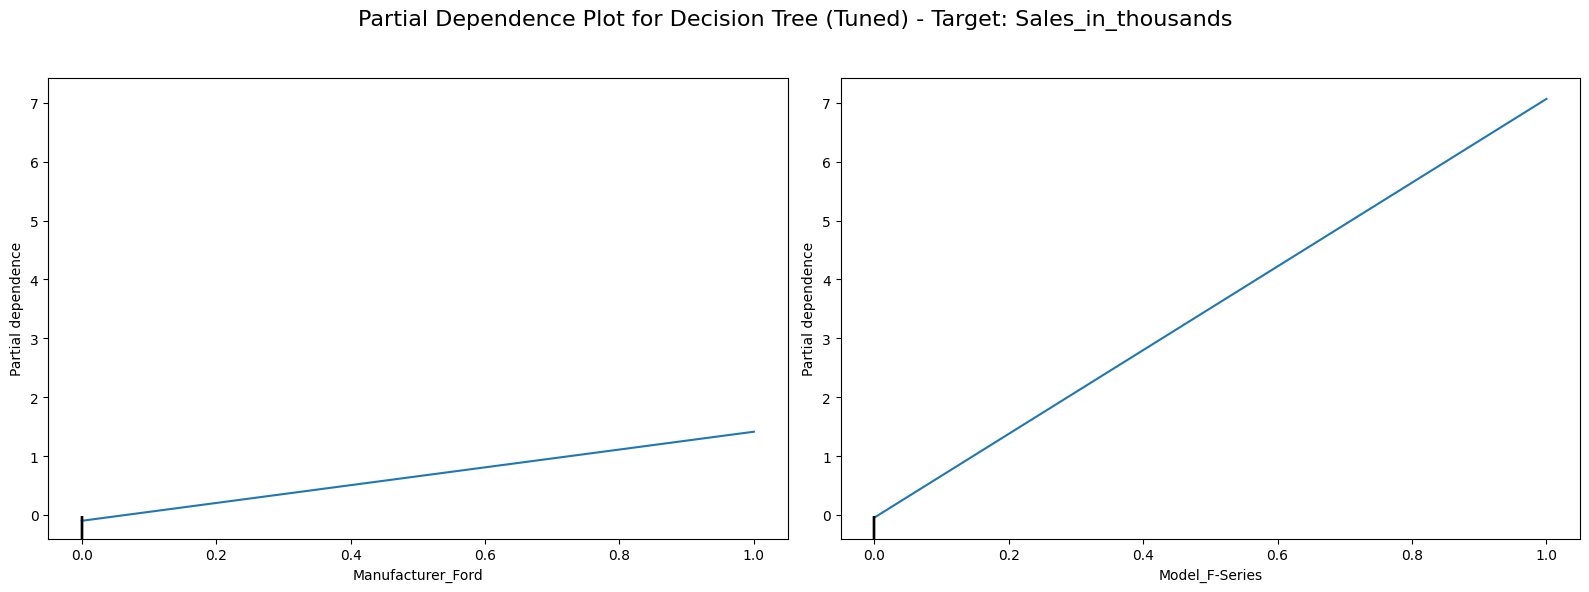

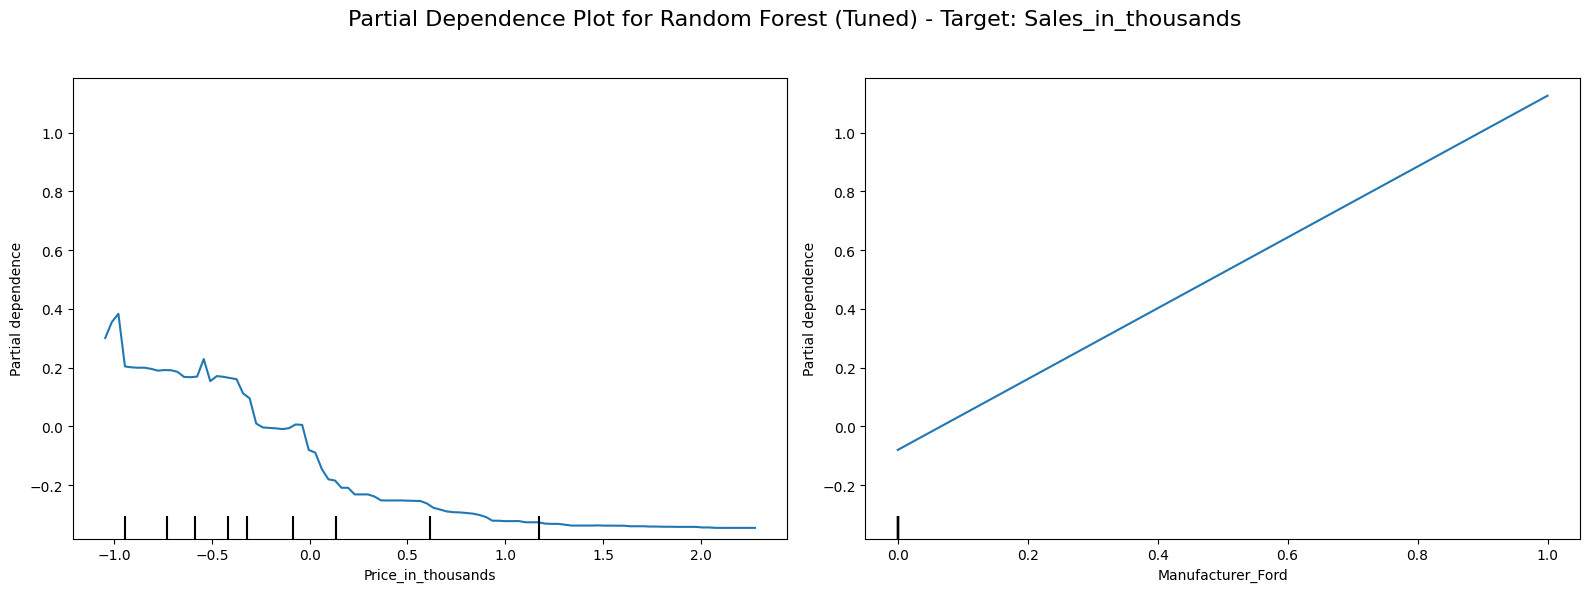

In [ ]:
# Plot partial dependence plots using the best models after hyperparameter tuning
for target, results in all_hyperparameter_results.items():
    X, y = prepare_data(carSales, target)

    # Print a header to separate the plots for each target
    print(f"\n========== Partial Dependence Plots for Target: {target} ==========\n")

    feature_list = X.columns.tolist()
    for model_name, model_details in results.items():
        if model_name in ['Decision Tree', 'Random Forest']:
            best_model = model_details['Model']
            if hasattr(best_model, 'feature_importances_'):
                importances = best_model.feature_importances_
                indices = np.argsort(importances)[-2:]  # Indices of top 2 features
                features_to_plot = [feature_list[i] for i in indices]
                plot_partial_dependence(best_model, X, features_to_plot, f"{model_name} (Tuned)", target)


###LIME Explanations

In [ ]:
# LIME explanations using best models after hyperparameter tuning
for target in targets:
    X, y = prepare_data(carSales, target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print a header to separate the explanations for each target
    print(f"\n========== LIME Explanations for Target: {target} ==========\n")

    for model_name, model_details in all_hyperparameter_results[target].items():
        if model_name == 'Random Forest':
            best_model = model_details['Model']
            explain_with_lime(best_model, X_train, X_test, X.columns.tolist(), instance_idx=0)



========== LIME Explanations for Target: __year_resale_value ==========



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names




========== LIME Explanations for Target: Sales_in_thousands ==========



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### SHAP Explanations


========== SHAP Explanations for Target: __year_resale_value ==========



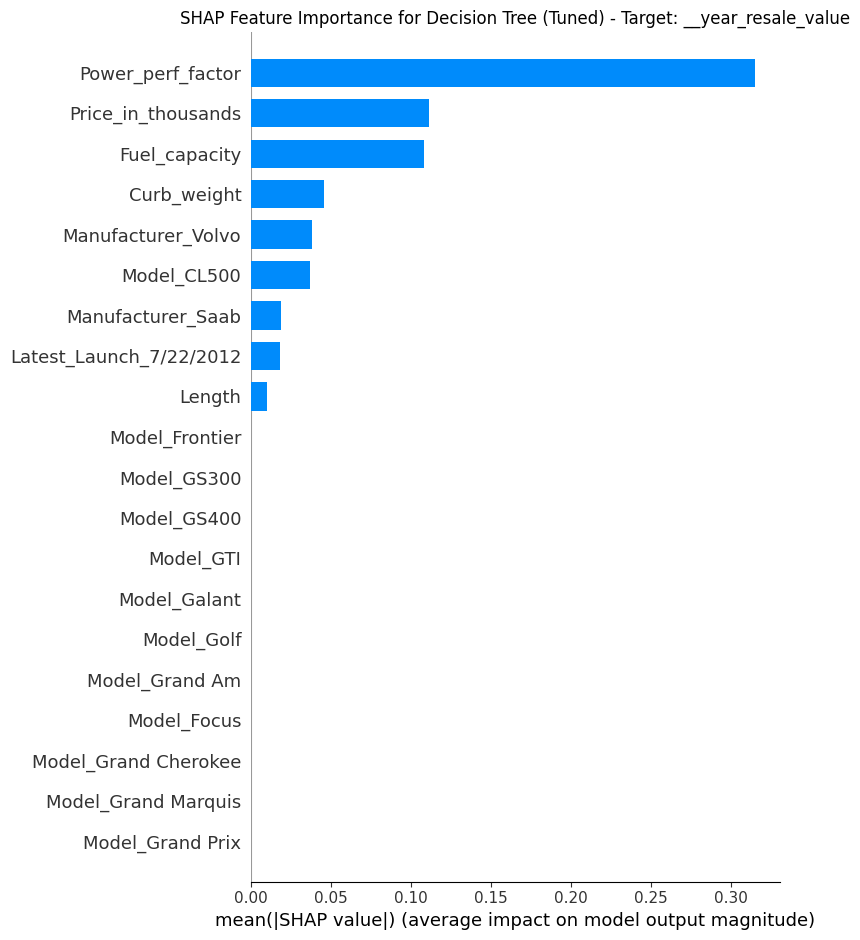

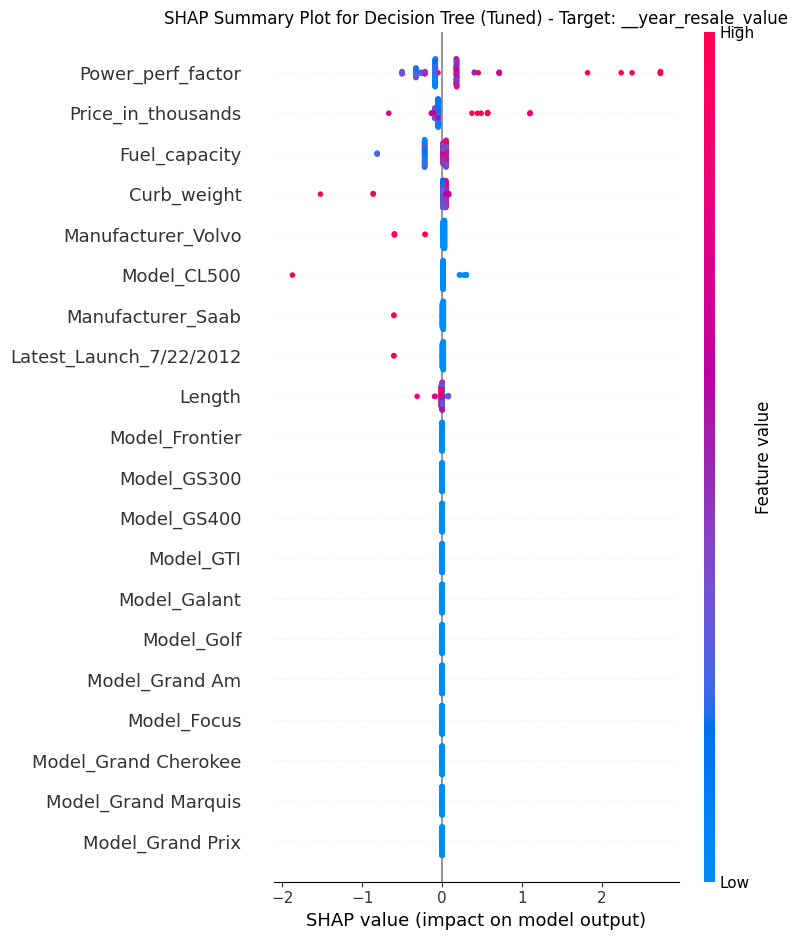

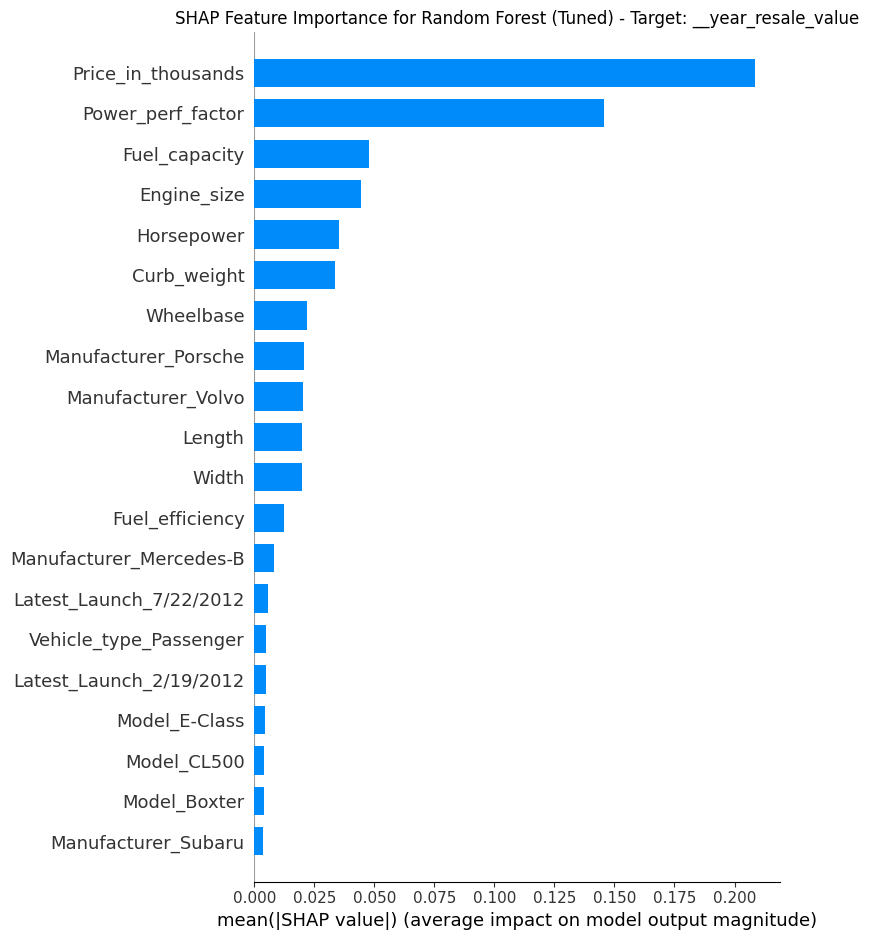

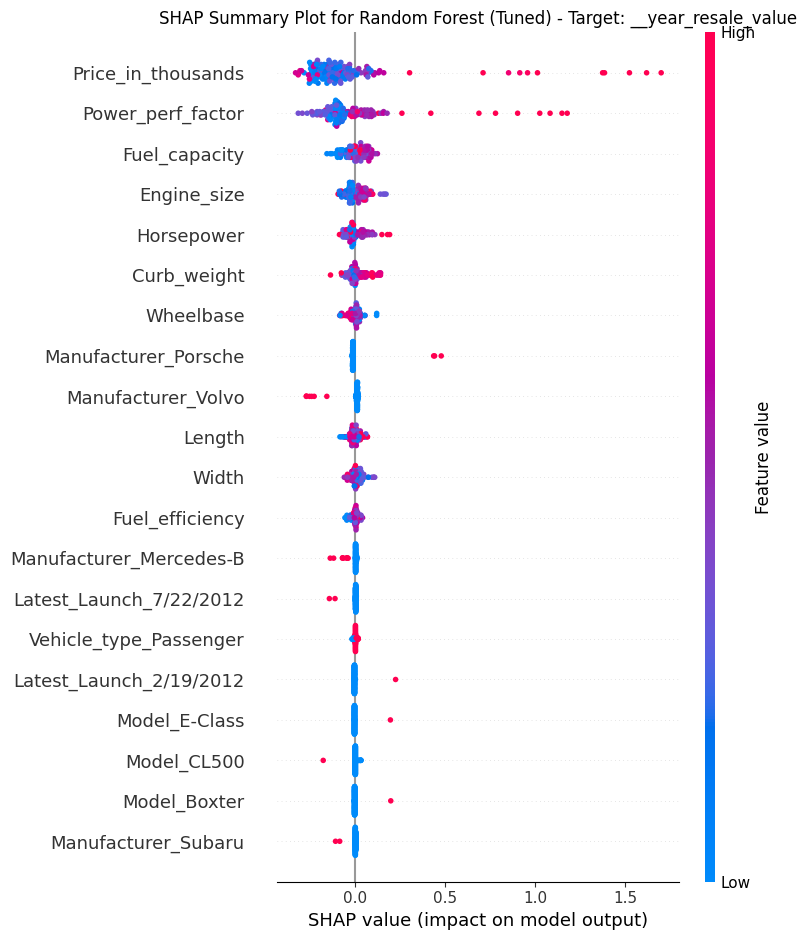


========== SHAP Explanations for Target: Sales_in_thousands ==========



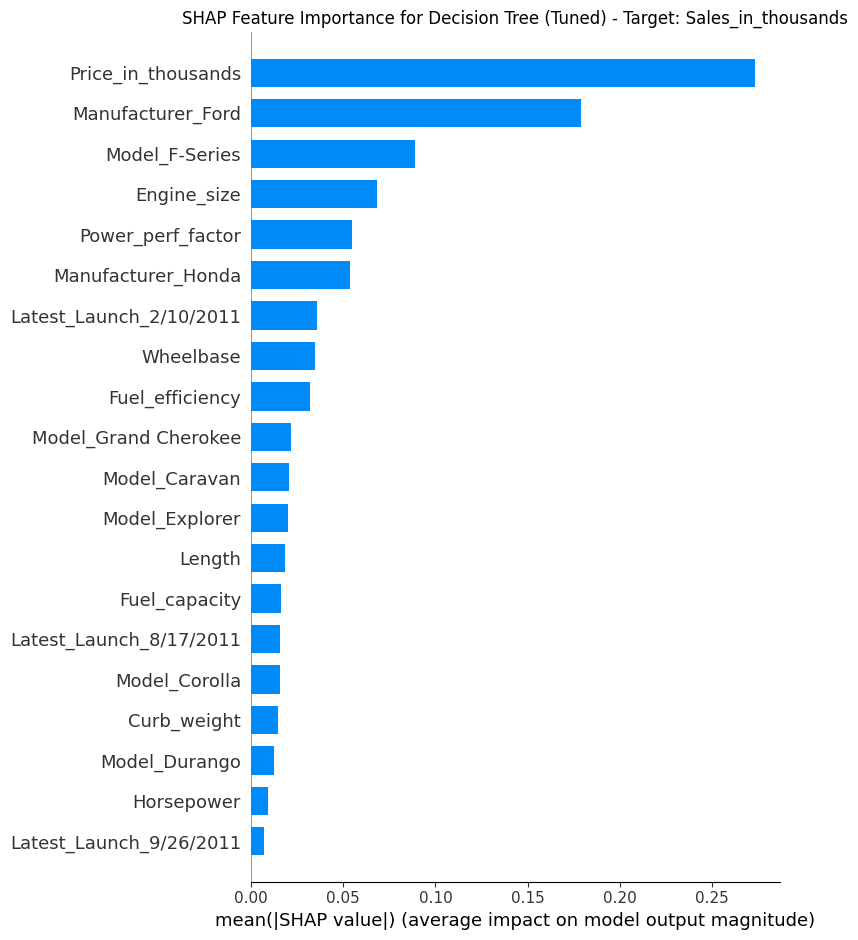

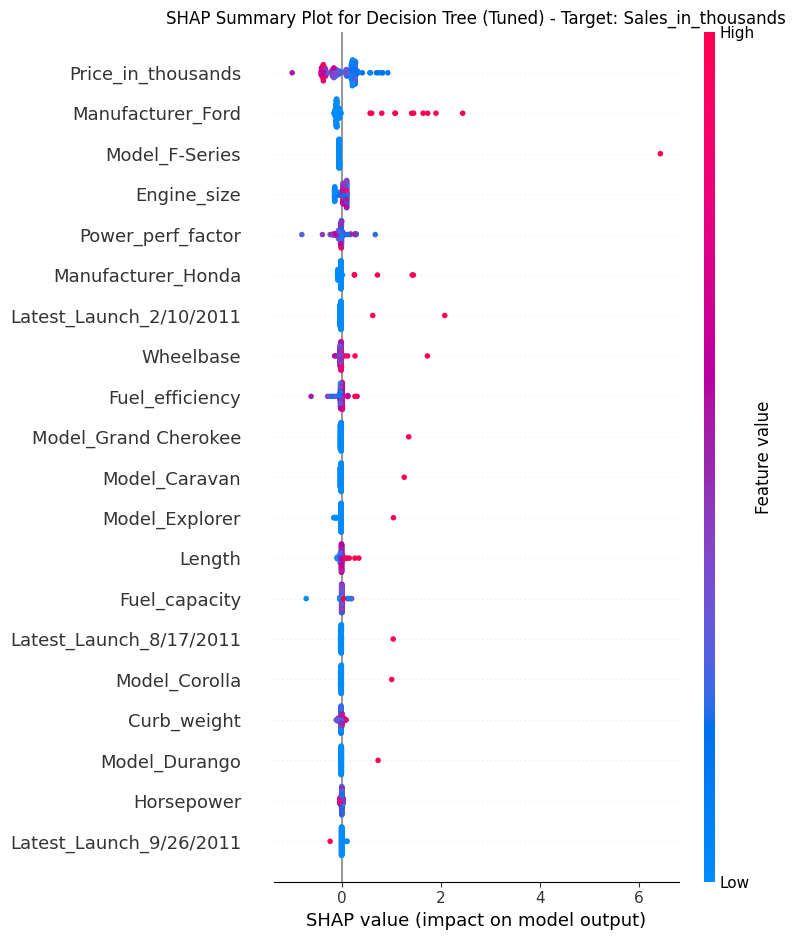

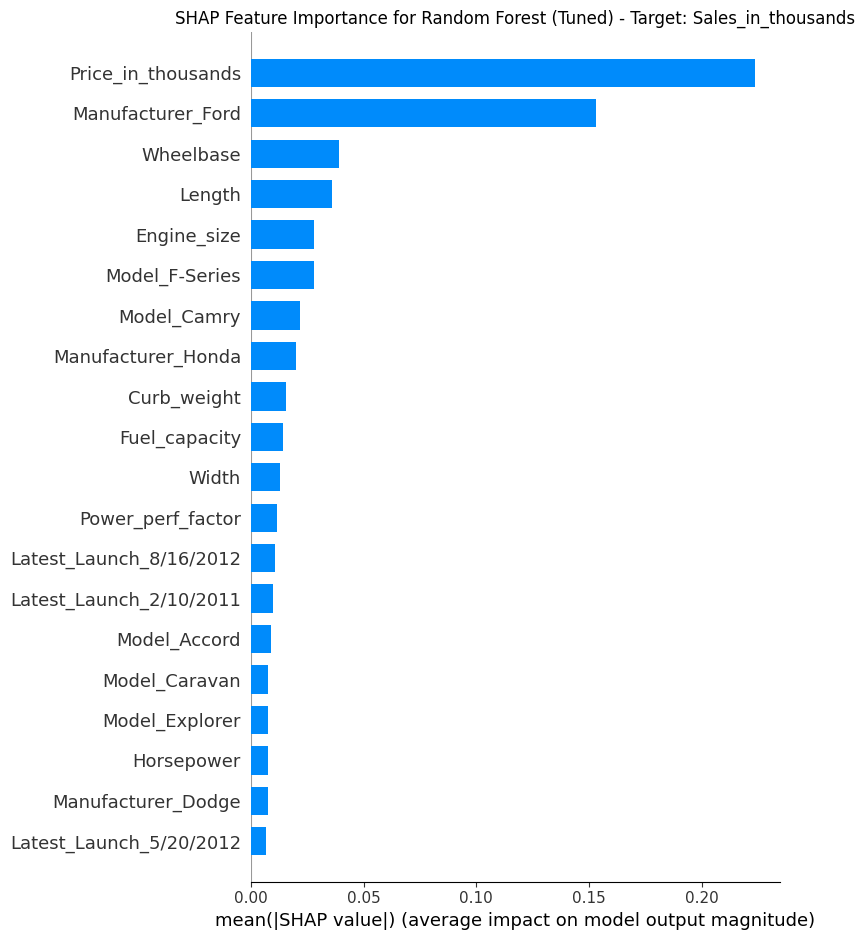

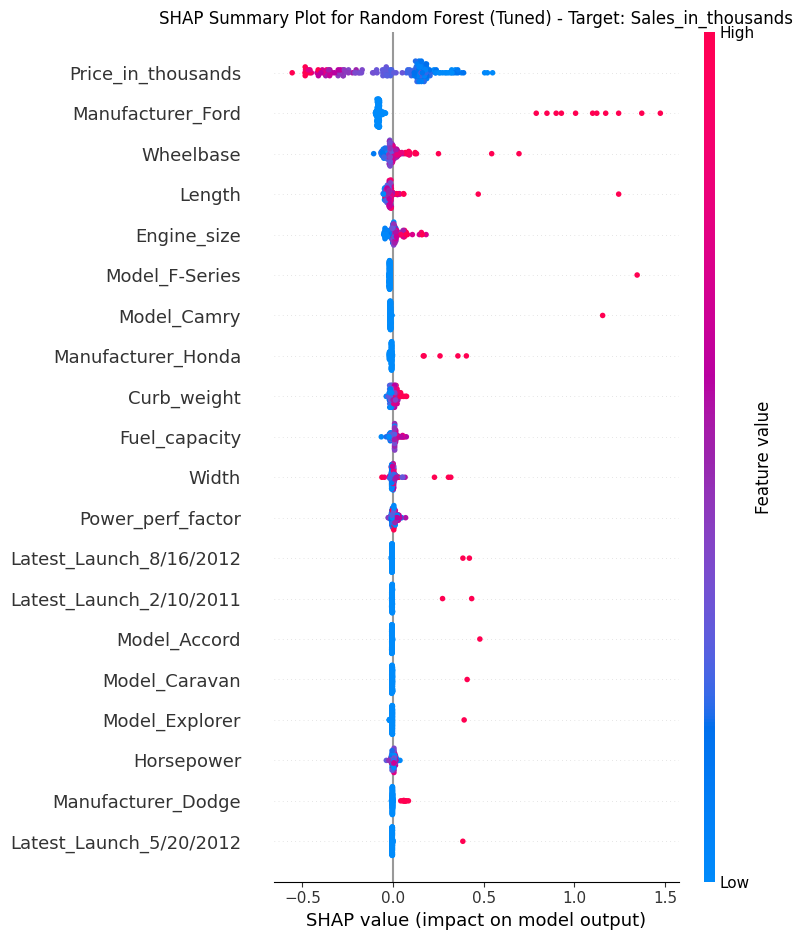

In [ ]:
# SHAP explanations using best models after hyperparameter tuning
for target in targets:
    X, y = prepare_data(carSales, target)

    # Print a header to separate the explanations for each target
    print(f"\n========== SHAP Explanations for Target: {target} ==========\n")

    for model_name, model_details in all_hyperparameter_results[target].items():
        if model_name in ['Random Forest', 'Decision Tree', 'XGBoost']:  # Include other tree-based models if any
            best_model = model_details['Model']
            explain_with_shap(best_model, X, model_name + ' (Tuned)', target)


### Plot coefficients for Linear Regression

In [ ]:
# Plot coefficients for Linear Regression after hyperparameter tuning
for target, results in all_hyperparameter_results.items():
    X, y = prepare_data(carSales, target)

    # Print a header to separate the plots for each target
    print(f"\n========== Linear Regression Coefficients for Target: {target} ==========\n")

    for model_name, model_details in results.items():
        if model_name == 'Linear Regression':
            best_model = model_details['Model']
            plot_linear_coefficients(best_model, X, f"{model_name} (Tuned)", target)



========== Linear Regression Coefficients for Target: __year_resale_value ==========




========== Linear Regression Coefficients for Target: Sales_in_thousands ==========



### SHAP explanations for Linear Regression


========== SHAP Explanations for Linear Regression - Target: __year_resale_value ==========



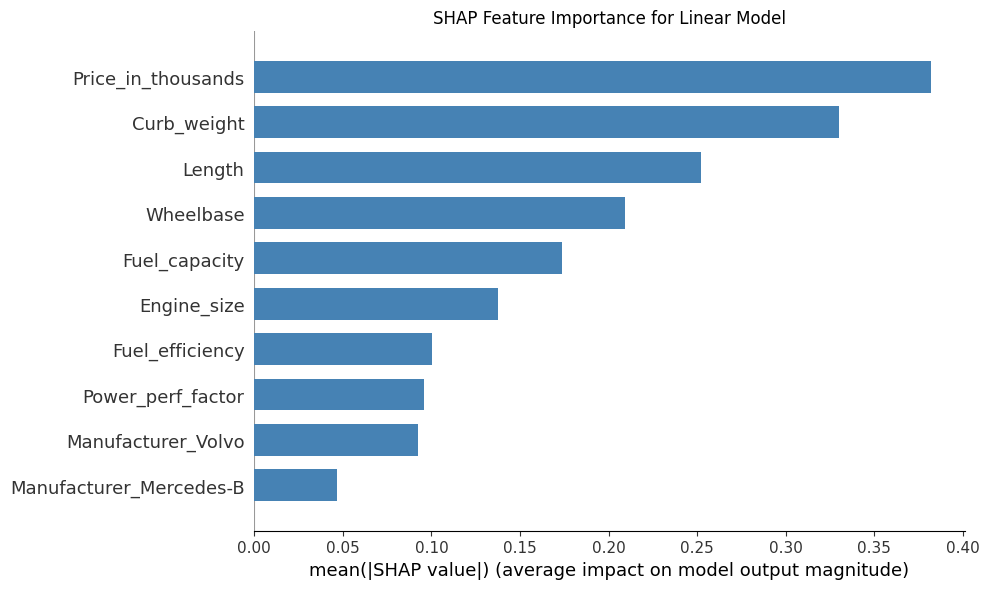

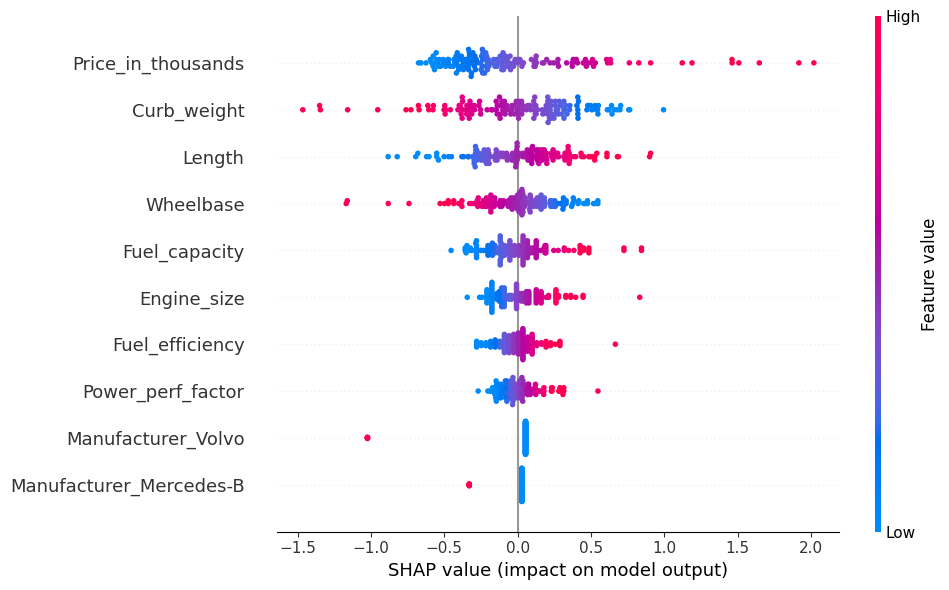


========== SHAP Explanations for Linear Regression - Target: Sales_in_thousands ==========



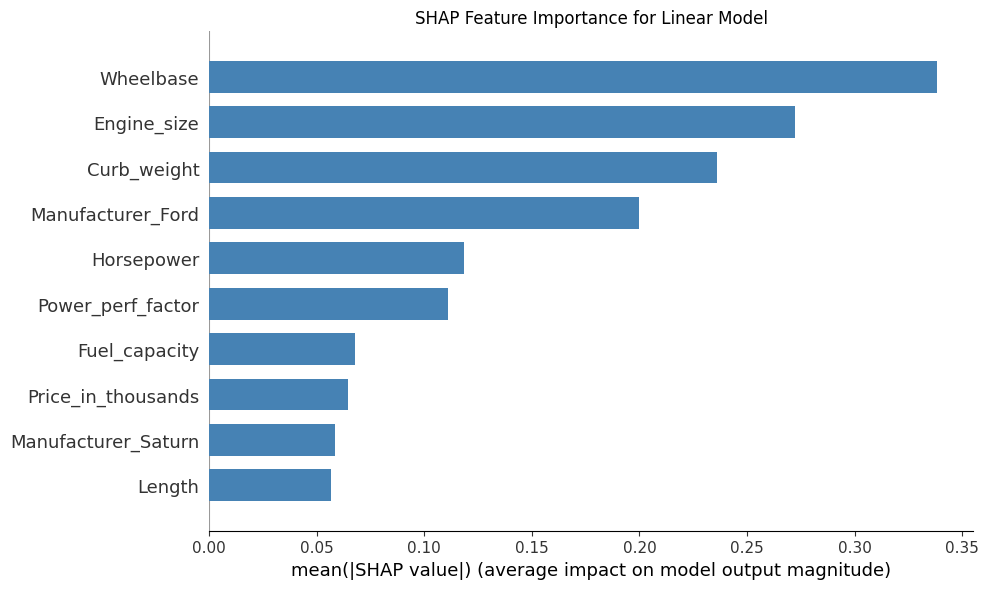

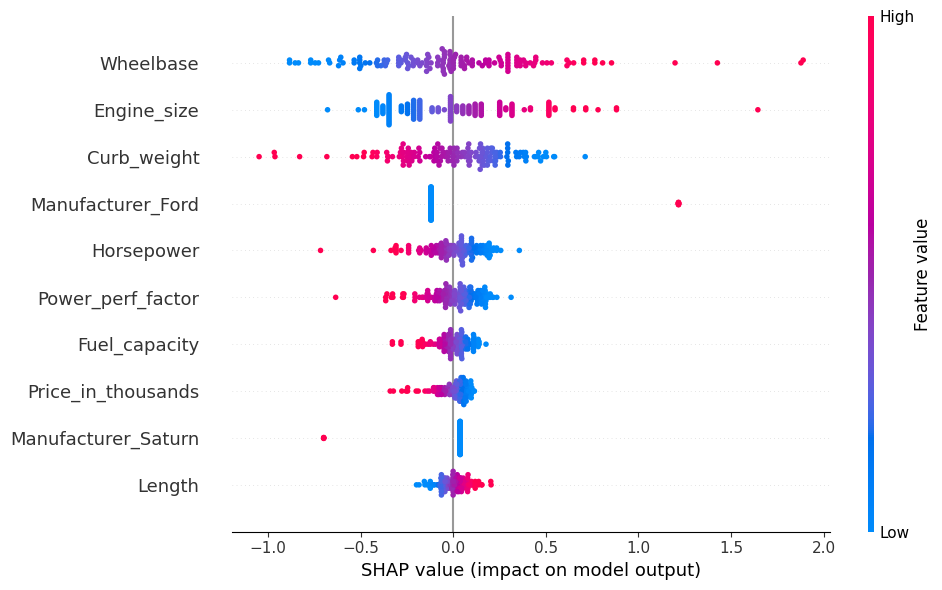

In [ ]:
# SHAP explanations for Linear Regression after hyperparameter tuning
for target in targets:
    X, y = prepare_data(carSales, target)

    # Print a header to separate the explanations for each target
    print(f"\n========== SHAP Explanations for Linear Regression - Target: {target} ==========\n")

    for model_name, model_details in all_hyperparameter_results[target].items():
        if model_name == 'Linear Regression':
            best_model = model_details['Model']
            explain_with_shap_linear(best_model, X)


- As evident from the plots, all the models have effectively learned to perform the task Corectly.